CS 498: HOME WORK 3

Team:

- Mallory Brandt (mbrandt4)
- Yusuf Bhabhrawala (ynb2)

Table of Contents:

- Source code
- Part 1 output
- Part 2 output
- Part 3 output

PART 1 OUTPUT:

Mean images in each category

airplane


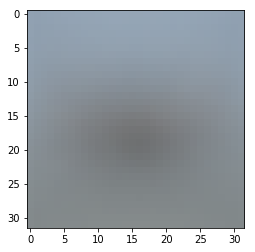

automobile


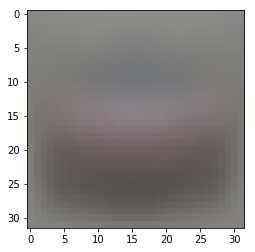

bird


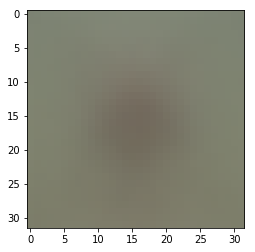

cat


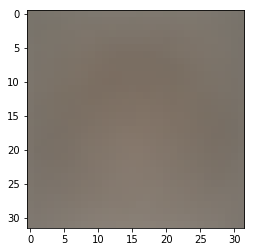

deer


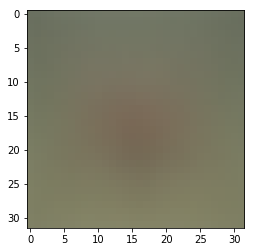

dog


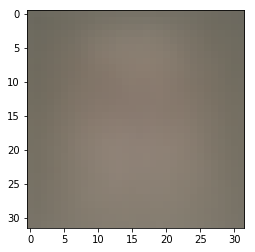

frog


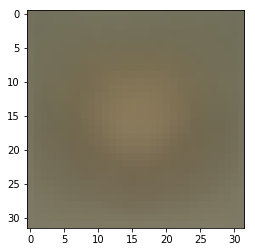

horse


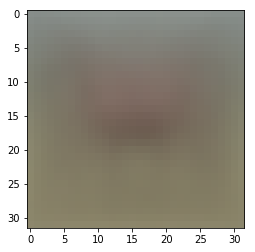

ship


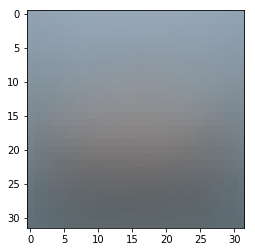

truck


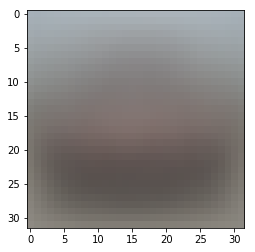


Plot of error from resulting images



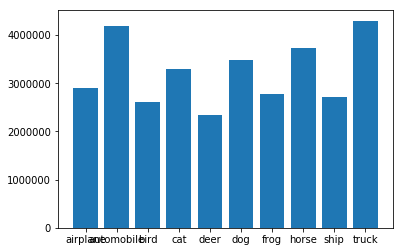



PART 2 OUTPUT:

Mean distance



,0,1,2,3,4,5,6,7,8,9
0,0.000000,1683.633571,1604.720536,1905.625357,2148.103349,1964.910176,2445.778813,1663.200830,946.514131,1448.680779
1,1683.633571,0.000000,886.425406,1028.020428,1142.948818,1215.877461,1191.237172,950.927442,1303.647575,950.777577
2,1604.720536,886.425406,0.000000,517.830088,601.117293,701.666587,914.458310,418.419646,1557.943195,1416.743449
3,1905.625357,1028.020428,517.830088,0.000000,469.834013,412.834107,678.424646,597.010050,1851.693549,1676.886997
4,2148.103349,1142.948818,601.117293,469.834013,0.000000,617.745902,461.976190,684.499087,2065.189338,1830.474802
5,1964.910176,1215.877461,701.666587,412.834107,617.745902,0.000000,829.414251,843.776629,1897.542885,1880.215413
6,2445.778813,1191.237172,914.458310,678.424646,461.976190,829.414251,0.000000,949.502501,2249.180073,1913.311266
7,1663.200830,950.927442,418.419646,597.010050,684.499087,843.776629,949.502501,0.000000,1660.211432,1347.255358
8,946.514131,1303.647575,1557.943195,1851.693549,2065.189338,1897.542885,2249.180073,1660.211432,0.000000,1066.897840
9,1448.680779,950.777577,1416.743449,1676.886997,1830.474802,1880.215413,1913.311266,1347.255358,1066.897840,0.000000



2D Map



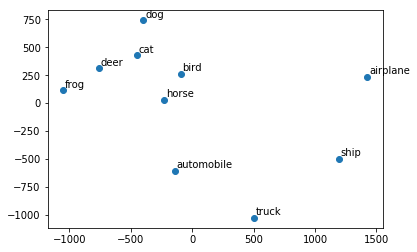


PART 3 OUTPUT:

Cross PCA Matrix and 2D map



,0,1,2,3,4,5,6,7,8,9
0,2903616.0,3030023.0,2984392.0,3025996.0,2880154.0,3061728.0,2982863.0,2987492.0,2994769.0,3266430.0
1,3030023.0,4196350.0,4693896.0,4594377.0,4577547.0,4651534.0,4529467.0,4673948.0,4551431.0,4337564.0
2,2984392.0,4693896.0,2618751.0,2620196.0,2706069.0,2674425.0,2676794.0,2818324.0,3075967.0,3116094.0
3,3025996.0,4594377.0,2620196.0,3292136.0,3559872.0,3361379.0,3434396.0,3552190.0,3943767.0,3638330.0
4,2880154.0,4577547.0,2706069.0,3559872.0,2341365.0,2487365.0,2406084.0,2493833.0,2596441.0,2815883.0
5,3061728.0,4651534.0,2674425.0,3361379.0,2487365.0,3473351.0,3577462.0,3708309.0,4231914.0,3852182.0
6,2982863.0,4529467.0,2676794.0,3434396.0,2406084.0,3577462.0,2766713.0,3051586.0,3158486.0,3210240.0
7,2987492.0,4673948.0,2818324.0,3552190.0,2493833.0,3708309.0,3051586.0,3722113.0,4238964.0,4133531.0
8,2994769.0,4551431.0,3075967.0,3943767.0,2596441.0,4231914.0,3158486.0,4238964.0,2706683.0,2874202.0
9,3266430.0,4337564.0,3116094.0,3638330.0,2815883.0,3852182.0,3210240.0,4133531.0,2874202.0,4298174.0


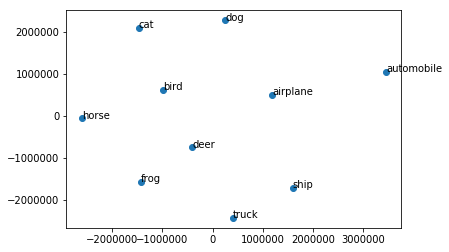

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import euclidean_distances
from scipy.spatial import distance
import os
import sys

%matplotlib inline

cifar_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class Hw3:
    
    X = [None]*10 # List of DataFrames
    X_mean = [None]*10 # List of np.array
    X_centered = [None]*10 # List of DataFrames (centered for PCA)
    X_pca = [None]*10 # List of PCA models
    pca_err = [None]*10
    pca_x_err = np.zeros((10,10))
    similarities = None
    
    def __init__(self):
        self.load()
    
    # https://www.cs.toronto.edu/~kriz/cifar.html
    def unpickle(self, file):
        import pickle
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict

    def load(self):
        
        meta = self.unpickle("cifar-10-batches-py/batches.meta")
        X = pd.DataFrame()
        Y = pd.DataFrame()
        
        # use range(1,1) when developing (faster), range(1,6) for full data
        for i in range(1,6):
            data = self.unpickle("cifar-10-batches-py/data_batch_" + str(i))
            X = pd.concat([X, pd.DataFrame(data[b'data'])])
            Y = pd.concat([Y, pd.DataFrame(data[b'labels'])])
        
        # Adding the test batch
        data = self.unpickle("cifar-10-batches-py/test_batch")
        X = pd.concat([X, pd.DataFrame(data[b'data'])])
        Y = pd.concat([Y, pd.DataFrame(data[b'labels'])])
        
        X['label'] = Y
        X_groups = X.groupby('label')
        for i in range(0,10):
            self.X[i] = X_groups.get_group(i).drop('label', axis=1).reset_index(drop=True)
            self.X_mean[i] = self.X[i].mean().astype('uint8').values
            self.X_centered[i] = self.X[i] - self.X_mean[i]
    
    def draw(self, xi):
        plt.imshow(np.dstack((xi[0:1024].reshape(32,32), xi[1024:2048].reshape(32,32), xi[2048:3072].reshape(32,32))))
        plt.show()
    
    def drawMean(self, label):
        print (cifar_labels[label])
        self.draw(self.X_mean[label])
        
    def computePCA(self, label):
        pca = PCA(n_components=20)
        pca.fit(self.X_centered[label])
        self.X_pca[label] = pca        
        
    def part1_draw_mean(self):
        for i in range(0,10):
            self.drawMean(i)
            
    def part1_compute_pca(self):
        for i in range(0,10):
            self.computePCA(i)        
            
    def part1_calculate_error_option1(self):
        for i in range(0,10):
            components = self.X_pca[i].transform(self.X_centered[i])
            inv = self.X_pca[i].inverse_transform(components)
            var = self.X_pca[i].explained_variance_
            varDF = pd.DataFrame(var)
            varPlot = var[20:3071]
            varPlot = pd.DataFrame(varPlot)
            sumVar = sum(varPlot.values)
            self.pca_err[i] = int(sumVar[0])
       
    # https://piazza.com/class/jchzguhsowz6n9?cid=551
    def part1_calculate_error_option2(self):
        for i in range(0,10):
            X = self.X[i].astype('float')
            component = self.X_pca[i].transform(X)
            inv = pd.DataFrame(self.X_pca[i].inverse_transform(component))
            self.pca_err[i] = int(np.square(X-inv).sum(axis=1).mean())            
            
    def part1_plot_error(self):
        global cifar_labels
        plt.figure()
        plt.bar(cifar_labels, self.pca_err)
        plt.show()
                
    def part2_mean_distances(self):
        self.similarities = euclidean_distances(self.X_mean)
        display(pd.DataFrame(self.similarities))
        
    def part2_2d_map(self):
        global cifar_labels
        # http://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html
        mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=200, dissimilarity="precomputed", n_jobs=1)
        pos = mds.fit(self.similarities).embedding_
        plt.figure()
        plt.scatter(pos[:,0], pos[:,1])
        for i in range (0,10):
            xy=(pos[i][0]+15,pos[i][1]+25)
            plt.annotate(cifar_labels[i],xy)
        plt.show()
        
    def part3_calculate_cross_error(self):
        for i in range(0,10):
            for j in range(i,10):
                X = self.X[i].astype('float')
                pca = self.X_pca[j]
                component = pca.transform(X)
                inv = pd.DataFrame(pca.inverse_transform(component))
                error = int(np.square(X-inv).sum(axis=1).mean())
                self.pca_x_err[i][j] = error
                self.pca_x_err[j][i] = error
        
        display(pd.DataFrame(self.pca_x_err))
        
        global cifar_labels
        mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=200, dissimilarity="precomputed", n_jobs=1)
        pos = mds.fit(self.pca_x_err).embedding_
        plt.figure()
        plt.scatter(pos[:,0], pos[:,1])
        for i in range (0,10):
            xy=(pos[i][0]+15,pos[i][1]+25)
            plt.annotate(cifar_labels[i],xy)
        plt.show()        
        

hw = Hw3()
print("PART 1 OUTPUT:")
print("\nMean images in each category\n")
hw.part1_draw_mean()
hw.part1_compute_pca()
hw.part1_calculate_error_option2()

print("\nPlot of error from resulting images\n")
hw.part1_plot_error()

print("\n\nPART 2 OUTPUT:")
print("\nMean distance\n")
hw.part2_mean_distances()

print("\n2D Map\n")
hw.part2_2d_map()

print("\nPART 3 OUTPUT:")
print("\nCross PCA Matrix and 2D map\n")
hw.part3_calculate_cross_error()



In the previous 2D map the PCA for each category was selected based on the specific images in that category. The PCA's were chosen to theoretically resemble the original image in that # of PCAs. To use one category's PCA values on another's mean image would drastically change the image to pull it towards something resembling the other image. In this case though we're seeing less "clusters" of logical groupings because of this. 


END